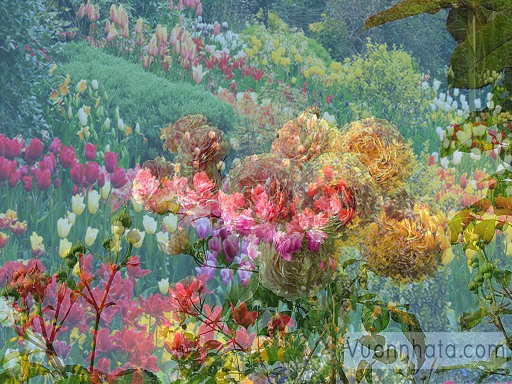

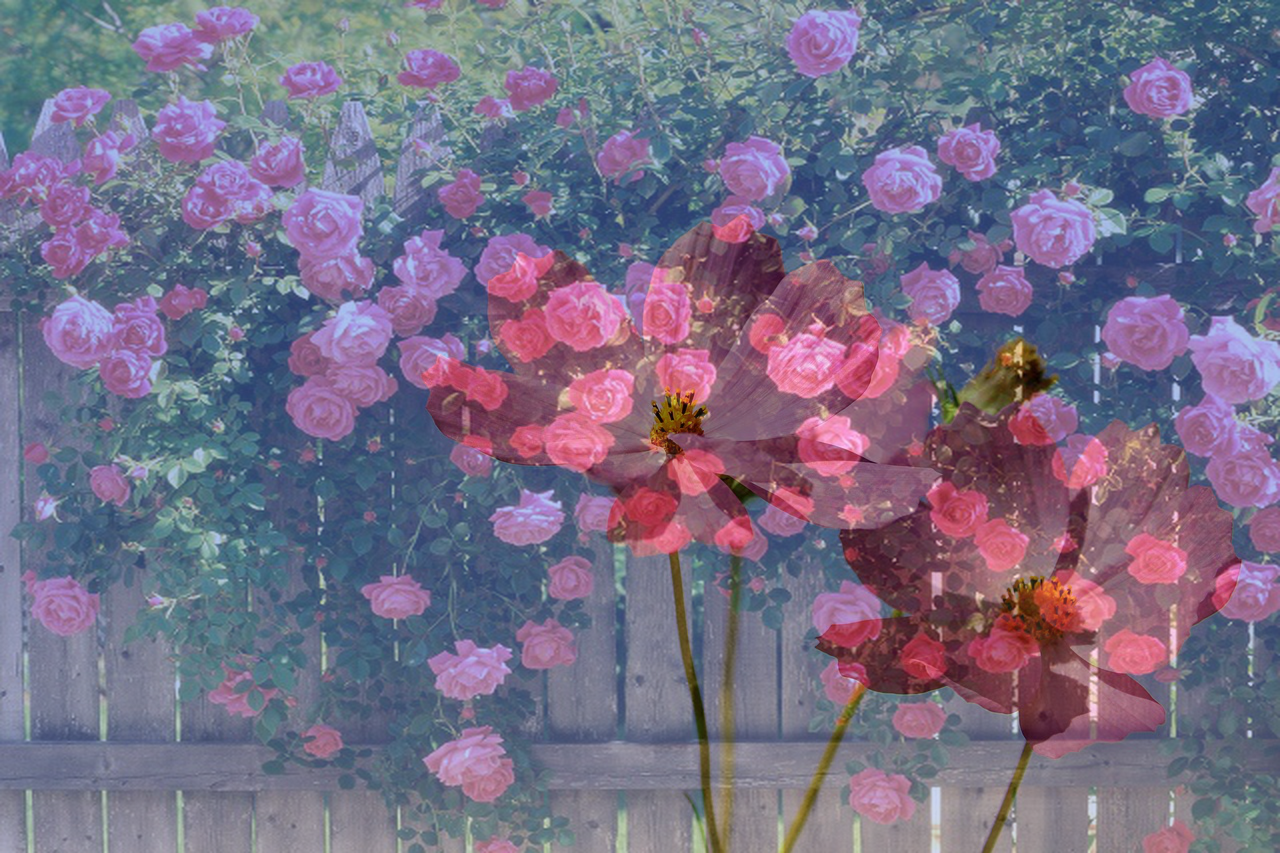

In [14]:
import numpy as np
from PIL import Image
import os

# thay đổi kích thước ảnh để không gặp lỗi
def resize_image(image, target_size):
    return image.resize(target_size, Image.LANCZOS)

def average_images(image_list):
    try:
        # chuyển màu để không gặp lỗi
        first_image = Image.open(image_list[0]).convert('RGB')
        target_size = first_image.size
        total_array = np.array(first_image, 'f')
        count = 1

        # Iterate over the remaining images
        for image_path in image_list[1:]:
            try:
                # Open each image, resize to target size, and convert to RGB
                image = Image.open(image_path).convert('RGB')
                image_resized = resize_image(image, target_size)
                image_array = np.array(image_resized, 'f')

                # Add to the total array
                total_array += image_array
                count += 1
            except Exception as e:
                print(f"Skipping {image_path} due to error: {e}")

        # tổng %
        average_array = total_array / count

        
        average_image = Image.fromarray(np.uint8(average_array))
        return average_image
    
    except Exception as e:
        print(f"Error during processing: {e}")
        return None

# Example usage
my_path_1 = os.getcwd() + "/img/img (1).jpg"
my_path_2 = os.getcwd() + "/img/img (2).jpg"
image_list = [my_path_1, my_path_2]
result_image = average_images(image_list)

display(result_image)

# Another batch of images
my_path_1 = os.getcwd() + "/img/img (3).jpg"
my_path_2 = os.getcwd() + "/img/img (4).jpg"
image_list = [my_path_1, my_path_2]
result_image = average_images(image_list)

display(result_image)
